## Imports

In [82]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from time import perf_counter

## Obtain and Preprocess Data

In [52]:
def get_data(path):
    filenames_list = []
    for root, subdirs, files in os.walk(path):
        for file in files:
            if file[-4:] == '.csv':
                filenames_list.append(os.path.join(root, file))
    return filenames_list

class Data_csv:
    def __init__(self, name, data):
        self.name = name
        self.data = data

data_list = get_data('Data')
class_data_list = []

i = 0
for i in range(len(data_list)):
    class_data_list.append(Data_csv(data_list[i], pd.read_csv(data_list[i])))
    class_data_list[i].data.drop(columns = ['Unnamed: 0'], inplace = True)
    if class_data_list[i].name[class_data_list[i].name.index('\\')+2] == 'C':
        class_data_list[i].data['Current'] = int(class_data_list[i].name[class_data_list[i].name.index('\\')+1])
    else:
        class_data_list[i].data['Current'] = int(class_data_list[i].name[5:7]) 
    


### Example of data

In [199]:
class_data_list[0].data

,x,y,Current
0,0.000000,3.249915,10
1,0.000000,3.247179,10
2,0.000000,3.244444,10
3,0.000000,3.241709,10
4,0.000000,3.238974,10
...,...,...,...
3755,22.114061,2.043761,10
3756,22.139626,2.043761,10
3757,22.165192,2.043761,10
3758,22.190757,2.043761,10


## Train-Test Split

In [90]:
full_data = pd.DataFrame()
X = pd.DataFrame()
y = pd.DataFrame()

i = 0
for i in range(len(class_data_list)):

    full_data = pd.concat([full_data, class_data_list[i].data], ignore_index=True)

X = full_data.drop(columns=['y'])
y = full_data['y']

train_X, test_X = train_test_split(X, test_size=0.2, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.2, random_state=42)

## Build the Model

In [165]:
model=tf.keras.models.Sequential([

    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
           ])

model.compile(optimizer='adam',
              loss=tf.keras.losses.mae)

history = model.fit(x = train_X, y = train_y, epochs=100)


Epoch 1/100
589/589 [==============================] - 2s 2ms/step - loss: 0.4227
Epoch 2/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1454
Epoch 3/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1416
Epoch 4/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1318
Epoch 5/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1370
Epoch 6/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1348
Epoch 7/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1343
Epoch 8/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1300
Epoch 9/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1301
Epoch 10/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1299
Epoch 11/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1303
Epoch 12/100
589/589 [==============================] - 1s 2ms/step - loss: 0.1270
Epoch 13/100


### Get Test Loss

In [182]:
test_loss = model.evaluate(test_X,test_y)

148/148 [==============================] - 0s 897us/step - loss: 0.1273


## Visualize Metrics

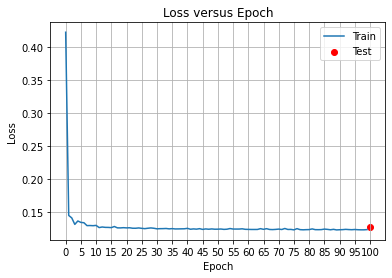

In [201]:
plt.plot(history.epoch,history.history['loss'])
plt.title('Loss versus Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xticks(np.arange(0,101,5))
plt.scatter(100,test_loss,color='r')
plt.legend(('Train', 'Test'))

## Save the Model

In [200]:
model.save('model.h5')